In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import re
import os

### Lessons learned
* Make notes on classic EDA stuff
 * grouping and aggregating
 * summary statistics
 * basic plots
 * correlations
* os basics
* regexp basics

# Cell data processing

- []Circumradius different length
- [x]Files not saved
- []Negative theta - just anomalous results + biasedness?
- []Nonsense results in estimation sometimes
- []Estimates are not centered at the estimated value
- []Edge length multimodality

In [47]:
dirname = 'files/'
filenames = os.listdir(dirname)

cdata = pd.DataFrame(columns=pd.read_csv(dirname + filenames[0], sep = ';').columns)

for filename in filenames:
    newdata = pd.read_csv(dirname + filename, sep=';')
    # print(newdata)
    cdata = cdata.append(newdata)
    
cdata = cdata.reset_index()

In [48]:
cdata['theta'].value_counts()

1    50
Name: theta, dtype: int64

In [69]:
cdata['K'].value_counts()

1    50
Name: K, dtype: int64

In [49]:
def listify(string):
        strlist = string[1:-2].replace(' ','').split(',')[:-1]
        result = [float(num) for num in strlist]
        return(result)

#### Filter anomalous results

In [50]:
cdataf = celldata.loc[np.abs(celldata['theta_est']) < 1000]
len(cdataf) / len(cdata)

0.5

In [53]:
cdataf.loc[:,'z_est'] = pd.to_numeric(cdataf.loc[:,'z_est'])

C:\Users\Adéla\Miniconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Estimation summary

In [54]:
cdataf.groupby(['theta'])['theta_est','theta_known_z_est', 'z_est', 'z_known_theta_est'].agg(['mean','std'])

theta_est           theta_known_z_est                z_est             \
           mean       std              mean       std       mean        std   
theta                                                                         
1      2.167555  0.992948          1.896468  0.740379  570.35792  76.757701   

      z_known_theta_est             
                   mean        std  
theta                               
1             509.56352  32.307029

### Estimates summary plot for a single $\theta$

In [33]:
theta = 1
cdatafA = cdataf.loc[cdataf['theta']== theta]

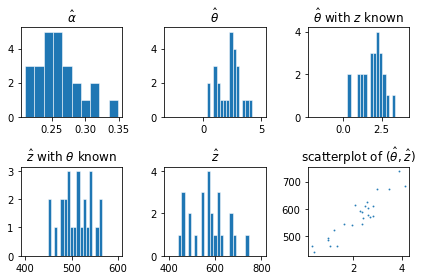

In [41]:
plt.subplot(2,3,1)
plt.title(r'$\hat\alpha$')
plt.hist(cdatafA['alpha_est'], edgecolor='white', linewidth=0.5)

plt.subplot(2,3,2)
plt.title(r'$\hat\theta$')
plt.hist(cdatafA['theta_est'], bins = np.linspace(theta-4,theta+4,30), edgecolor='white', linewidth=0.5)

plt.subplot(2,3,3)
plt.title(r'$\hat\theta$ with $z$ known')
plt.hist(cdatafA['theta_known_z_est'], bins = np.linspace(theta-3,theta+3,30), edgecolor='white', linewidth=0.5)

plt.subplot(2,3,4)
plt.title(r'$\hat z$ with $\theta$ known')
plt.hist(cdatafA['z_known_theta_est'], bins = np.linspace(400,600,30), edgecolor='white', linewidth=0.5)

plt.subplot(2,3,5)
plt.title(r'$\hat z$')
plt.hist(cdatafA['z_est'], bins = np.linspace(400,800,30), edgecolor='white', linewidth=0.5)

plt.subplot(2,3,6)
plt.title(r'scatterplot of $(\hat\theta,\hat z)$')
plt.scatter(cdatafA['theta_est'], cdatafA['z_est'], alpha=0.9, s=0.8)

plt.tight_layout()
plt.show()

# plt.savefig('estimates_delaunay.pdf')

### Facets distribution - one plot

In [63]:
cdataA = cdataf.iloc[1]

In [64]:
volumesA = listify(cdataA.tetra_volume)
circumA = listify(cdataA.tetra_circum)
tsurfA = listify(cdataA.tetra_surface)
surfA = listify(cdataA.face_surf)
lengthA = listify(cdataA.edge_length)
degreeA = listify(cdataA.point_degree)

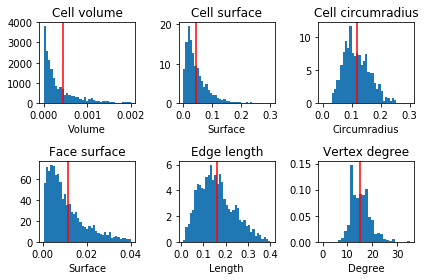

In [82]:
plt.subplot(2,3,1)
bins = np.linspace(0,0.002,40)
plt.hist(volumesA, bins, density = True)
plt.xlabel("Volume")
plt.axvline(x=np.mean(volumesA), c='r')
#plt.ylabel("Density")
plt.title('Cell volume')
plt.locator_params(nbins=4)

plt.subplot(2,3,2)
bins = np.linspace(0,0.3,40)
plt.hist(tsurfA, bins, density = True)
plt.xlabel("Surface")
plt.axvline(x=np.mean(tsurfA), c='r')
#plt.ylabel("Density")
plt.title('Cell surface')
plt.locator_params(nbins=4)

plt.subplot(2,3,3)
bins = np.linspace(0,0.3,40)
plt.hist(circumA, bins, density = True)
plt.xlabel("Circumradius")
plt.axvline(x=np.mean(circumA), c='r')
#plt.ylabel("Density")
plt.title('Cell circumradius')
plt.locator_params(nbins=4)

plt.subplot(2,3,4)
bins_surf = np.linspace(0.0004,0.04,40)
plt.hist(surfA,bins_surf, density = True)
plt.xlabel("Surface")
plt.axvline(x=np.mean(surfA), c='r')
#plt.ylabel("Density")
plt.title('Face surface')
plt.locator_params(nbins=4)

plt.subplot(2,3,5)
bins_length = np.linspace(0.01,0.4,40)
plt.hist(lengthA,bins_length, density = True)
plt.xlabel("Length")
plt.axvline(x=np.mean(lengthA), c='r')
#plt.ylabel("Density")
plt.title('Edge length')
plt.locator_params(nbins=6)

plt.subplot(2,3,6)
bins_deg = np.linspace(0,35,30)
plt.hist(degreeA,bins_deg, density = True)
plt.xlabel("Degree")
plt.axvline(x=np.mean(degreeA), c='r')
#plt.ylabel("Density")
plt.title('Vertex degree')
plt.locator_params(nbins=6)

plt.tight_layout()
plt.show()

# plt.savefig('facets_Poisson.pdf')

### Facets distribution - Comparison plot

In [14]:
thetaA = 0.1
thetaB = 10

In [15]:
celldataA = celldata.loc[celldata['theta']==thetaA,].iloc[0]
celldataB = celldata.loc[celldata['theta']==thetaB,].iloc[0]


In [17]:
volumesA = listify(celldataA.tetra_volume)
volumesB = listify(celldataB.tetra_volume)

circumA = listify(celldataA.tetra_circum)
circumB = listify(celldataB.tetra_circum)

surfA = listify(celldataA.face_surf)
surfB = listify(celldataB.face_surf)

lengthA = listify(celldataA.edge_length)
lengthB = listify(celldataB.edge_length)

degreeA = listify(celldataA.point_degree)
degreeB = listify(celldataB.point_degree)

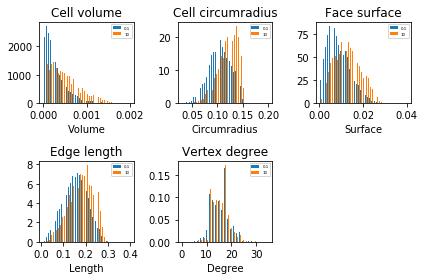

In [18]:
plt.subplot(2,3,1)
bins = np.linspace(0,0.002,40)
plt.hist([volumesA,volumesB],bins, density = True,  label=[thetaA,thetaB])
plt.legend(loc='upper right',prop={'size': 4})
plt.xlabel("Volume")
#plt.ylabel("Density")
plt.title('Cell volume')
plt.locator_params(nbins=4)

plt.subplot(2,3,2)
bins_circum = np.linspace(0.03,0.2,40)
plt.hist([circumA,circumB],bins_circum, density = True, label=[thetaA,thetaB])
plt.legend(loc='upper right',prop={'size': 4})
plt.xlabel("Circumradius")
#plt.ylabel("Density")
plt.title('Cell circumradius')
plt.locator_params(nbins=4)


plt.subplot(2,3,3)
bins_surf = np.linspace(0.0004,0.04,40)
plt.hist([surfA,surfB],bins_surf, density = True, label=[thetaA,thetaB])
plt.legend(loc='upper right',prop={'size': 4})
plt.xlabel("Surface")
#plt.ylabel("Density")
plt.title('Face surface')
plt.locator_params(nbins=4)


plt.subplot(2,3,4)
bins_length = np.linspace(0.01,0.4,40)
plt.hist([lengthA,lengthB],bins_length, density = True, label=[thetaA, thetaB])
plt.legend(loc='upper right',prop={'size': 4})
plt.xlabel("Length")
#plt.ylabel("Density")
plt.title('Edge length')
plt.locator_params(nbins=6)

plt.subplot(2,3,5)
bins_deg = np.linspace(0,35,30)
plt.hist([degreeA,degreeB],bins_deg, density = True, label=[thetaA, thetaB])
plt.legend(loc='upper right',prop={'size': 4})
plt.xlabel("Degree")
#plt.ylabel("Density")
plt.title('Vertex degree')
plt.locator_params(nbins=6)

plt.tight_layout()
plt.show()

# plt.savefig('facets_extr.pdf')

### Multiple theta estimate plots

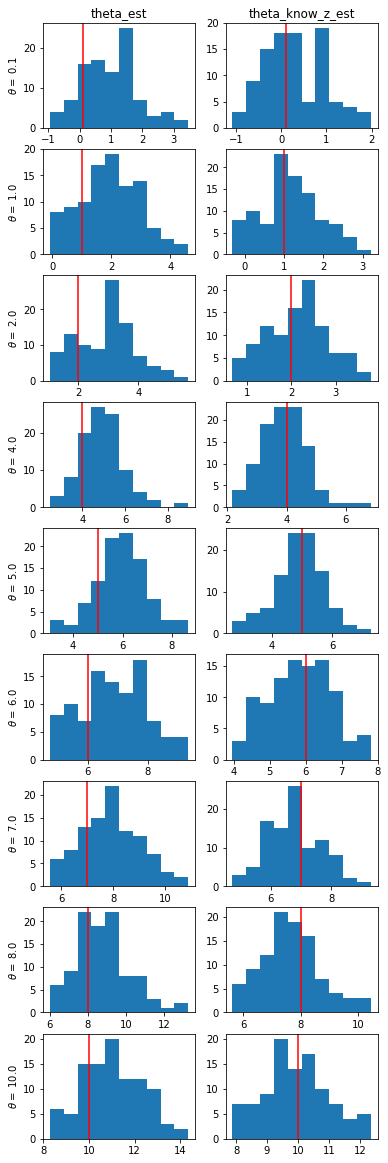

In [71]:
groupnum = len(cdataf.groupby(['theta']))
thetas = cdataf.groupby(['theta'])['theta_est','theta_known_z_est'].agg(['mean','std']).index

for i, theta in enumerate(thetas):
    plt.subplot(groupnum,2,2*i+1)
    plt.ylabel(r'$\theta = $ ' + str(theta))
    plt.hist(cdataf.loc[cdataf['theta'] == thetas[i], 'theta_est'])
    plt.axvline(x=thetas[i], c='r')
    if (i==0):
        plt.title('theta_est')

    plt.subplot(groupnum,2,2*i+2)
    plt.hist(cdataf.loc[cdataf['theta'] == thetas[i], 'theta_known_z_est'])
    plt.axvline(x=thetas[i], c='r')
    if (i==0):
        plt.title('theta_know_z_est')
    
# plt.tight_layout(pad = 2, w_pad = 2, h_pad = 5)
plt.subplots_adjust(top=4)

# plt.show()

plt.savefig('estimates_mult.pdf')

### Summary stats table prep

In [378]:
print('{0:.5f}'.format(np.mean(volumesA)) + ' (' + '{0:.5f}'.format(np.std(volumesA)) + ')' + ' & ' +  '{0:.5f}'.format(np.mean(volumesB)) + ' (' + '{0:.5f}'.format(np.std(volumesB)) + ') \\\\')
print('{0:.4f}'.format(np.mean(circumA)) + ' (' + '{0:.4f}'.format(np.std(circumA)) + ')' +' & ' + '{0:.4f}'.format(np.mean(circumB)) + ' (' + '{0:.4f}'.format(np.std(circumB)) + ') \\\\')
print('{0:.4f}'.format(np.mean(surfA)) + ' (' + '{0:.4f}'.format(np.std(surfA)) + ')' +' & ' + '{0:.4f}'.format(np.mean(surfB)) + ' (' + '{0:.4f}'.format(np.std(surfB)) + ') \\\\')
print('{0:.2f}'.format(np.mean(lengthA)) + ' (' + '{0:.2f}'.format(np.std(lengthA)) + ')' + ' & ' + '{0:.2f}'.format(np.mean(lengthB)) + ' (' + '{0:.2f}'.format(np.std(lengthB)) + ') \\\\')
print('{0:.2f}'.format(np.mean(degreeA)) + ' (' + '{0:.2f}'.format(np.std(degreeA)) + ')' + ' & ' + '{0:.2f}'.format(np.mean(degreeB)) + ' (' + '{0:.2f}'.format(np.std(degreeB)) + ') \\\\')


0.00033 (0.00024) & 0.00044 (0.00030) \\
0.1104 (0.0190) & 0.1157 (0.0196) \\
0.0099 (0.0049) & 0.0116 (0.0055) \\
0.16 (0.05) & 0.17 (0.05) \\
15.09 (4.04) & 15.14 (3.80) \\


### LaTeX table prep

In [496]:
print(r'$\hat\alpha$ ' + '{0:.5f}'.format(np.mean(df['alpha_est'])) + ' (' + '{0:.5f}'.format(np.std(df['alpha_est'])) + ')' )
print(r'$\hat\theta$ ' + '{0:.4f}'.format(np.mean(df['theta_est'])) + ' (' + '{0:.4f}'.format(np.std(df['theta_est'])) )
print(r'$\hat\theta$ with $z$ known ' +'{0:.4f}'.format(np.mean(df['theta_z_known_est'])) + ' (' + '{0:.4f}'.format(np.std(df['theta_z_known_est'])) )
print(r'$\hat z$ ' +'{0:.2f}'.format(np.mean(df['z_est'])) + ' (' + '{0:.2f}'.format(np.std(df['z_est'])) + ')' )


$\hat\alpha$ 0.19794 (0.00683)
$\hat\theta$ 2.8791 (0.9459
$\hat\theta$ with $z$ known 3.2078 (0.7978
$\hat z$ 426.63 (43.79)


---

# Diagnostic plots

In [5]:
log = pd.read_csv('files/log_3_6_20180926_08_45_21_42948.csv', sep=',')

### Accept + move type statistics

In [6]:
log['accept'].value_counts()

1    2761350
0     238650
Name: accept, dtype: int64

In [7]:
log['type'].value_counts()

M    1000425
D    1000314
B     999261
Name: type, dtype: int64

In [8]:
log.groupby('accept')['type'].value_counts()

accept  type
0       M        85243
        D        77081
        B        76326
1       D       923233
        B       922935
        M       915182
Name: type, dtype: int64

### Convergence

In [9]:
log['time'] = log['time'].replace(math.nan,'',regex=True)
log['time'] = pd.to_numeric(log['time'])

In [10]:
block_length = 40000
groupby_blocks = np.repeat(range(int(len(log)/block_length)),block_length)
groupby_blocks = np.array([0] + list(groupby_blocks+1))[0:-1]

In [11]:
groupedlog = log.groupby([groupby_blocks, 'type'])['accept'].sum().reset_index()

In [12]:
groupedmeanlog = log.groupby([groupby_blocks])['energy','no_act_vrt','time'].mean().reset_index()

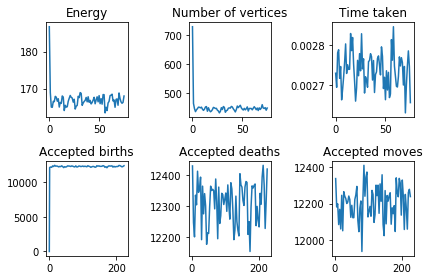

In [16]:
plt.subplot(2,3,1)
plt.title('Energy')
# plt.ylim(240,250)
groupedmeanlog['energy'].plot()

plt.subplot(2,3,2)
plt.title('Number of vertices')
# plt.ylim(450,520)
groupedmeanlog['no_act_vrt'].plot()

plt.subplot(2,3,3)
plt.title('Time taken')
# plt.ylim(0.0028,0.0032)
groupedmeanlog['time'].plot()

plt.subplot(2,3,4)
plt.title('Accepted births')
groupedlog[groupedlog['type'] == 'B']['accept'].plot()

plt.subplot(2,3,5)
plt.title('Accepted deaths')
# plt.ylim(5000,5800)
groupedlog[groupedlog['type'] == 'D']['accept'].plot()

plt.subplot(2,3,6)
plt.title('Accepted moves')
groupedlog[groupedlog['type'] == 'M']['accept'].plot()


plt.tight_layout()
plt.show()

# plt.savefig('convergence.pdf')

### Checking if the energy does not move by itself

In [89]:
lognona = log[~log.isnull().any(axis=1)]
logshift = lognona.assign(shiftenergy = lognona['energy'].shift(-1))

In [90]:
logshift[(logshift['shiftenergy'] - logshift['energy'] != 0) & (logshift['accept'] != 1)]

,step_no,type,pt,pt_mv,energy,energy_after,b,ratio,accept,no_vrt,no_act_vrt,time,shiftenergy
1999999,2000000,B,0.260079 0.576914 0.170576 0.0041291,,145.211,-1.0,0.762074,0.511364,0.0,6142.0,871.0,0.002197,NaN


## Parsing Cell data from SLURM logs

In [483]:
def extract_data(filename):
    lines = []
    with open(filename,  'r') as slurm:
        for line in slurm:
            lines += [line]
            
    numbers_unflat = [re.findall("\d+\.\d+|\d+", line) for line in lines]
    data = []
    if len(numbers_unflat) == 12:
        numbers = [float(number) for sublist in numbers_unflat for number in sublist]
        data = [filename] + [numbers[i] for i in [3,4,5,6,7,8,11,12,13,14,15,16,18,19,20]]

    return(data)

In [484]:
columns = ['filename','theta','epsilon','alpha','z','max_weight', 'iterations','pts','pts_active','pts_removable','min_edge_est','epsilon_est','alpha_est','theta_est','z_est','theta_z_known_est']

df = pd.DataFrame(columns=columns)

In [485]:
data = []
success = 0
total = 0

for filename in os.listdir('slurmlogs'):
    total += 1
    slurm_parsed = extract_data('slurmlogs/' + filename) 
    if len(slurm_parsed) == 16:
        data += [slurm_parsed]
        success += 1
    
print('Success rate:', success, 'out of', total,'. (',success/total, ')')

Success rate: 303 out of 303 . ( 1.0 )
